In [2]:
# Importing the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Fetching the dataset
df=pd.read_csv("titanic_dataset_alive_ded.csv")

In [4]:
# Displaying the results dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking how many unique elements are present in the "Survived" feature.

In [5]:
df['Survived'].unique()

array([0, 1], dtype=int64)

Since there are only two unique values, I am assuming that 1 indicates that the passenger survived, and 0 indicates that the passenger did not survive.

In [6]:
surv=df[df.Survived==1]

In [7]:
surv.shape

(152, 12)

In [8]:
ded=df[df.Survived==0]

In [9]:
ded.shape

(266, 12)

It is seen that 152 passengers survived and 266 died

Checking which of the genders have survived in the majority using visualization

<AxesSubplot: xlabel='Survived', ylabel='count'>

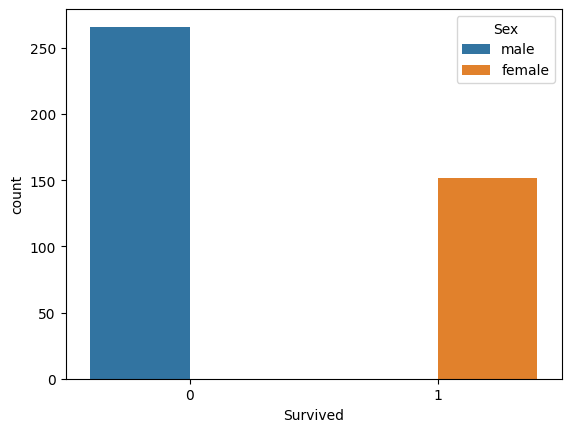

In [12]:
sns.countplot(data=df,x='Survived', hue='Sex')
# sns.countplot(data=surv,x='Survived', hue='Sex')

In [13]:
# dropping the unnecessary features
gk=df.drop(['Name','Sex','Embarked','Ticket','Cabin'],axis=1)

In [14]:
gk

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,0,3,38.5,0,0,7.2500
416,1308,0,3,NaN,0,0,8.0500


In [15]:
gk.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272732,0.379699,0.274436,27.527877
1,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699


<AxesSubplot: xlabel='Sex'>

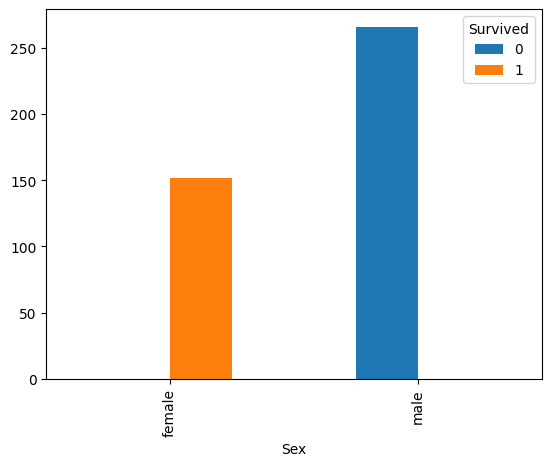

In [16]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

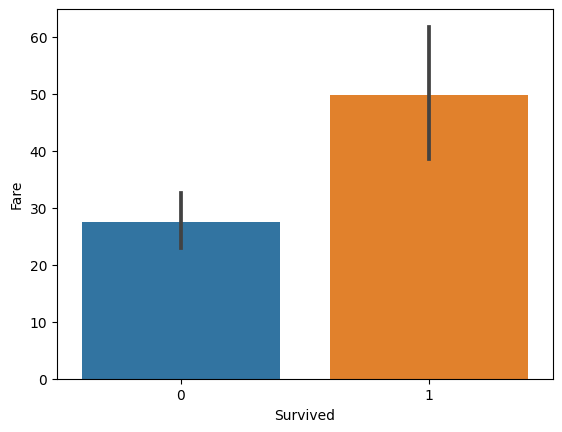

In [17]:
sns.barplot(data=df, x='Survived', y='Fare')

In [18]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='Embarked'>

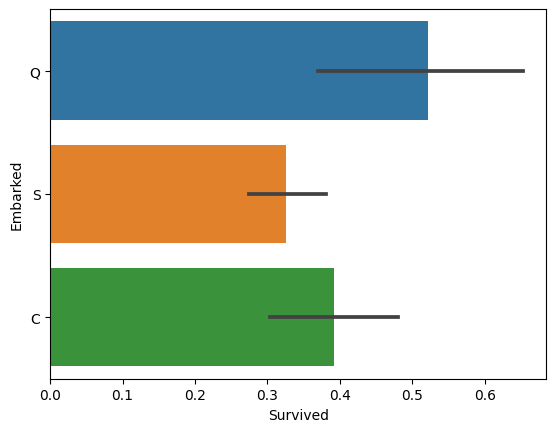

In [19]:
sns.barplot(data=df, x='Survived', y='Embarked')

<AxesSubplot: xlabel='Embarked'>

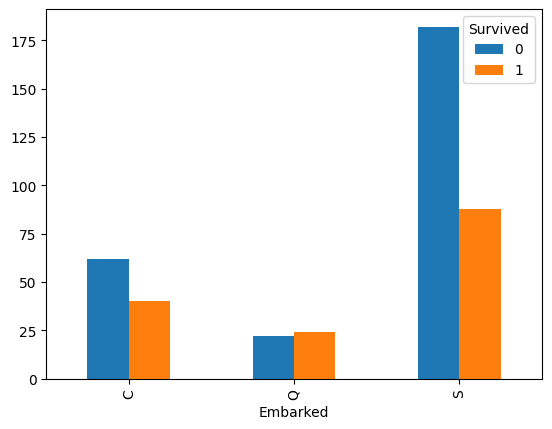

In [20]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

In [21]:
subdf=df[['PassengerId','Age','Ticket','Fare','Embarked','Sex']]

In [22]:
subdf.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex
0,892,34.5,330911,7.8292,Q,male
1,893,47.0,363272,7.0000,S,female
2,894,62.0,240276,9.6875,Q,male
3,895,27.0,315154,8.6625,S,male
4,896,22.0,3101298,12.2875,S,female


Encoding the 'Sex' feature using dummy encoding technique

In [23]:
sex_dummies=pd.get_dummies(subdf['Sex'],dtype=int,prefix="sex")

In [24]:
df_with_dummies= pd.concat([subdf,sex_dummies],axis='columns')
df_with_dummies.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
0,892,34.5,330911,7.8292,Q,male,0,1
1,893,47.0,363272,7.0000,S,female,1,0
2,894,62.0,240276,9.6875,Q,male,0,1
3,895,27.0,315154,8.6625,S,male,0,1
4,896,22.0,3101298,12.2875,S,female,1,0


Splitting the dataset to train and test for model predictions

In [26]:
X=df_with_dummies
X.head()

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
0,892,34.5,330911,7.8292,Q,male,0,1
1,893,47.0,363272,7.0000,S,female,1,0
2,894,62.0,240276,9.6875,Q,male,0,1
3,895,27.0,315154,8.6625,S,male,0,1
4,896,22.0,3101298,12.2875,S,female,1,0


In [27]:
y=df.Survived

In [28]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [30]:
X_train

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
290,1182,NaN,PC 17607,39.6000,S,male,0,1
83,975,NaN,349238,7.8958,S,male,0,1
65,957,NaN,F.C.C. 13534,21.0000,S,female,1,0
351,1243,25.0,F.C.C. 13540,10.5000,S,male,0,1
138,1030,23.0,SOTON/OQ 392083,8.0500,S,female,1,0
...,...,...,...,...,...,...,...,...
4,896,22.0,3101298,12.2875,S,female,1,0
75,967,32.5,113503,211.5000,C,male,0,1
341,1233,32.0,350403,7.5792,S,male,0,1
417,1309,NaN,2668,22.3583,C,male,0,1


Using Logistic Regression on the split dataset

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

We cannot perform logistic regression on the dataset with objects so we have to drop the embarked feature
Also, tickets values doesens't hold any significance for our model so we drop that too.

In [33]:
df_with_dummies=df_with_dummies.drop(['Embarked','Ticket'],axis=1)

In [34]:
x=df_with_dummies
x.head()

,PassengerId,Age,Fare,Sex,sex_female,sex_male
0,892,34.5,7.8292,male,0,1
1,893,47.0,7.0000,female,1,0
2,894,62.0,9.6875,male,0,1
3,895,27.0,8.6625,male,0,1
4,896,22.0,12.2875,female,1,0


In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          332 non-null    float64
 2   Fare         417 non-null    float64
 3   Sex          418 non-null    object 
 4   sex_female   418 non-null    int32  
 5   sex_male     418 non-null    int32  
dtypes: float64(2), int32(2), int64(1), object(1)
memory usage: 16.5+ KB


In [36]:
X_train

,PassengerId,Age,Ticket,Fare,Embarked,Sex,sex_female,sex_male
290,1182,NaN,PC 17607,39.6000,S,male,0,1
83,975,NaN,349238,7.8958,S,male,0,1
65,957,NaN,F.C.C. 13534,21.0000,S,female,1,0
351,1243,25.0,F.C.C. 13540,10.5000,S,male,0,1
138,1030,23.0,SOTON/OQ 392083,8.0500,S,female,1,0
...,...,...,...,...,...,...,...,...
4,896,22.0,3101298,12.2875,S,female,1,0
75,967,32.5,113503,211.5000,C,male,0,1
341,1233,32.0,350403,7.5792,S,male,0,1
417,1309,NaN,2668,22.3583,C,male,0,1


checking for null values and treating the null values

In [37]:
X_train.isnull().sum()

PassengerId     0
Age            59
Ticket          0
Fare            1
Embarked        0
Sex             0
sex_female      0
sex_male        0
dtype: int64

In [38]:
X_train['Age'].fillna(25, inplace=True)

In [39]:
X_train['Fare'].fillna(method ='ffill', limit = 1, inplace = True)

In [40]:
X_train.isnull().sum()

PassengerId    0
Age            0
Ticket         0
Fare           0
Embarked       0
Sex            0
sex_female     0
sex_male       0
dtype: int64

In [41]:
x.isnull().sum()

PassengerId     0
Age            86
Fare            1
Sex             0
sex_female      0
sex_male        0
dtype: int64

In [42]:
x['Age'].fillna(25, inplace=True)

In [43]:
x['Fare'].fillna(method ='ffill', limit = 1, inplace = True)

In [44]:
x.isnull().sum()

PassengerId    0
Age            0
Fare           0
Sex            0
sex_female     0
sex_male       0
dtype: int64

In [45]:
x

,PassengerId,Age,Fare,Sex,sex_female,sex_male
0,892,34.5,7.8292,male,0,1
1,893,47.0,7.0000,female,1,0
2,894,62.0,9.6875,male,0,1
3,895,27.0,8.6625,male,0,1
4,896,22.0,12.2875,female,1,0
...,...,...,...,...,...,...
413,1305,25.0,8.0500,male,0,1
414,1306,39.0,108.9000,female,1,0
415,1307,38.5,7.2500,male,0,1
416,1308,25.0,8.0500,male,0,1


In [46]:
x=x.drop(['Sex'],axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [48]:
x

,PassengerId,Age,Fare,sex_female,sex_male
0,892,34.5,7.8292,0,1
1,893,47.0,7.0000,1,0
2,894,62.0,9.6875,0,1
3,895,27.0,8.6625,0,1
4,896,22.0,12.2875,1,0
...,...,...,...,...,...
413,1305,25.0,8.0500,0,1
414,1306,39.0,108.9000,1,0
415,1307,38.5,7.2500,0,1
416,1308,25.0,8.0500,0,1


In [49]:
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [51]:
model.score(X_test,y_test)

1.0

Displaying the Classification report

In [52]:
from sklearn.metrics import accuracy_score, classification_report

In [54]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



We can see that the model shows 100 % accuracy